In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("addeddistancehyddep.csv")

In [ ]:
# col = ["AIRCRAFT","FROM","STD_MIN","ATD_MIN"]
# # for c in col:
# #   df = df[]
df1 = df[["AIRCRAFT","ORIGIN","STD_MIN","STA_MIN","ATD_MIN","Distance_km"]].copy()
# dummies=pd.get_dummies(df2[['AIRCRAFT','ORIGIN']])

# dummies.head()

In [ ]:
# cat_features=['AIRCRAFT','ORIGIN']
# one_hot=OneHotEncoder()
# # transformer=ColumnTransformer() 
# one_hot.fit_transform

In [ ]:
enc=OneHotEncoder()

enc_data=pd.DataFrame(enc.fit_transform(df1[['AIRCRAFT','ORIGIN']]).toarray())
  
#Merge with main
df1=df1.join(enc_data)

df1.head()

,AIRCRAFT,ORIGIN,STD_MIN,STA_MIN,ATD_MIN,Distance_km,0,1,2,3,...,73,74,75,76,77,78,79,80,81,82
0,AT76,HYD,27809595.0,27809665.0,27809656.0,304.811415,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AT76,HYD,27808155.0,27808225.0,27808256.0,304.811415,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AT76,HYD,27805275.0,27805345.0,27805306.0,304.811415,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AT76,HYD,27802395.0,27802465.0,27802422.0,304.811415,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AT76,HYD,27800955.0,27801025.0,27800959.0,304.811415,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df1['ATA_MIN']=df['ATA_MIN']
df1.drop(['AIRCRAFT','ORIGIN'],axis=1,inplace=True)
# df1=df1.dropna()

In [ ]:
X=df1.iloc[:,:-1].values
y=df1.iloc[:,[-1]].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50974, 87)
(25108, 87)
(50974, 1)
(25108, 1)


In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)
# 

LinearRegression()

In [ ]:
y_prediction =  LR.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# # predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))


r2 socre is  0.9999999961191951
mean_sqrd_error is== 84.86136341539715
root_mean_squared error of is== 9.21202276459395


In [ ]:
re=pd.DataFrame(y_test,columns=['y_test'])
# y_test
re['y_pred']=pd.DataFrame(y_prediction)
re['diff']=re['y_test']-re['y_pred']
re['ORIGIN']=df['ORIGIN']
re.to_csv('results.csv',index=False)
re

,y_test,y_pred,diff,ORIGIN
0,27734610.0,2.773461e+07,-1.226496,HYD
1,27608035.0,2.760805e+07,-13.050718,HYD
2,27493414.0,2.749341e+07,1.611352,HYD
3,27407997.0,2.740799e+07,2.266305,HYD
4,27585192.0,2.758519e+07,-0.498462,HYD
...,...,...,...,...
25103,27680021.0,2.768002e+07,-0.161975,HYD
25104,27803594.0,2.780360e+07,-9.352698,HYD
25105,27752578.0,2.775258e+07,-6.016674,HYD
25106,27721521.0,2.772152e+07,2.639223,HYD


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25108 entries, 0 to 25107
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y_test  25108 non-null  float64
 1   y_pred  25108 non-null  float64
 2   diff    25108 non-null  float64
 3   ORIGIN  25108 non-null  object 
dtypes: float64(3), object(1)
memory usage: 784.8+ KB


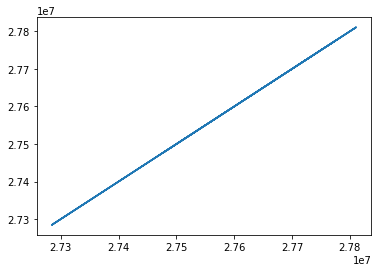

In [ ]:
plt.plot(y_test,y_prediction)
re.info()

In [ ]:
# # from sklearnex import patch_sklearn 
# # patch_sklearn()
# from sklearn.svm import SVR
# svr=SVR()
# svr.fit(X_train,y_train)

In [ ]:
# y_pred=svr.predict(X_test)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X1 = sc_X.fit_transform(X)
# # y=y.reshape(-1,1)
# # y1 = sc_y.fit_transform(y)
# X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33, random_state=42)
# #4 Fitting the Support Vector Regression Model to the dataset
# # Create your support vector regressor here
# from sklearn.svm import SVR
# # most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
# regressor = SVR(kernel='rbf')
# regressor.fit(X_train,y_train)
# #5 Predicting a new result
# y_pred = regressor.predict(X_test)

In [ ]:
# from sklearn import svm
# clf = svm.SVC()
# clf.fit(X_train,y_train)
# y_pred=clf.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = AdaBoostRegressor(DecisionTreeRegressor(max_depth=100), n_estimators=500,random_state=42)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
score=r2_score(y_test,y_pred)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  0.9999998748441116
mean_sqrd_error is== 2736.777437972908
root_mean_squared error of is== 52.314218315606205


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=500,max_depth=500,criterion="mse")
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)

<ipython-input-38-0d554b7cb4f6>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [ ]:
score=r2_score(y_test,y_pred)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  0.9999998950532459
mean_sqrd_error is== 2294.8653267768123
root_mean_squared error of is== 47.90475265333088


In [ ]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
score=r2_score(y_test,y_pred)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  0.9999999961220456
mean_sqrd_error is== 84.79903131159539
root_mean_squared error of is== 9.208638950007508


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y.reshape(-1,1))
# X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(51534, 114)
(25383, 114)
(51534, 1)
(25383, 1)


In [ ]:
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
clf = svm.SVR(kernel='rbf')
abc = AdaBoostRegressor(n_estimators=500,base_estimator=clf,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)
# clf.fit(X_train,y_train)
# y_pred=clf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score=r2_score(y_test,y_pred)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  0.9963509453895333
mean_sqrd_error is== 0.003683520485262629
root_mean_squared error of is== 0.060692013356475734
